In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using TensorFlow backend.


In [2]:
prices_dataset=pd.read_csv('prices.csv',header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [3]:
yahoo=prices_dataset[prices_dataset['symbol']=='YHOO']
yahoo_stock_prices=yahoo.close.values.astype('float32')
yahoo_stock_prices=yahoo_stock_prices.reshape(1762,1)
yahoo_stock_prices.shape

(1762, 1)

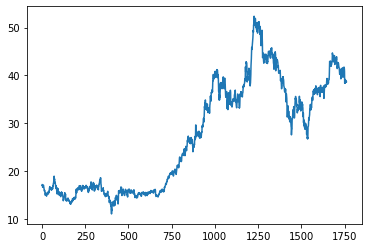

In [4]:
plt.plot(yahoo_stock_prices)
plt.show()
scaler=MinMaxScaler(feature_range=(0,1))
yahoo_stock_prices=scaler.fit_transform(yahoo_stock_prices)

In [5]:
train_size=int(len(yahoo_stock_prices)*0.80)
val_size=len(yahoo_stock_prices)-train_size
test_size=len(yahoo_stock_prices)-train_size
train,test=yahoo_stock_prices[0:train_size,:],yahoo_stock_prices[train_size:len(yahoo_stock_prices),:]
print(len(train),len(test))

1409 353


In [6]:
def create_dataset(dataset,lookback=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-lookback-1):
        a=dataset[i:(i+lookback),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
        
    return np.array(dataX),np.array(dataY)

In [7]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [8]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [9]:
model=Sequential()

model.add(LSTM(
input_dim=1,
output_dim=50,
return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,
              return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim=1))
model.add(Activation('linear'))
start=time.time()
model.compile(loss='mse',optimizer='rmsprop')
print ('compilation time : ', time.time() - start)



C:\Users\isheunesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\isheunesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  


compilation time :  0.024929523468017578


C:\Users\isheunesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  del sys.path[0]


In [10]:
model.fit(x=trainX,y=trainY,batch_size=128,nb_epoch=10,validation_split=0.05,validation_data=(testX,testY))

C:\Users\isheunesu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1407 samples, validate on 351 samples
Epoch 1/10
1407/1407 [==============================] - 1s 1ms/step - loss: 0.1481 - val_loss: 0.2162
Epoch 2/10
1407/1407 [==============================] - 0s 52us/step - loss: 0.0807 - val_loss: 0.0932
Epoch 3/10
1407/1407 [==============================] - 0s 59us/step - loss: 0.0445 - val_loss: 0.0362
Epoch 4/10
1407/1407 [==============================] - 0s 53us/step - loss: 0.0325 - val_loss: 0.0188
Epoch 5/10
1407/1407 [==============================] - ETA: 0s - loss: 0.022 - 0s 52us/step - loss: 0.0218 - val_loss: 0.0093
Epoch 6/10
1407/1407 [==============================] - 0s 43us/step - loss: 0.0123 - val_loss: 0.0047
Epoch 7/10
1407/1407 [==============================] - 0s 46us/step - loss: 0.0048 - val_loss: 0.0018
Epoch 8/10
1407/1407 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 6.3044e-04
Epoch 9/10
1407/1407 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 3.4822

[[0.6175935]]
[[1.5240772]]
[[3.7908142]]
[[ 36.58426]
 [ 74.00391]
 [167.57481]]


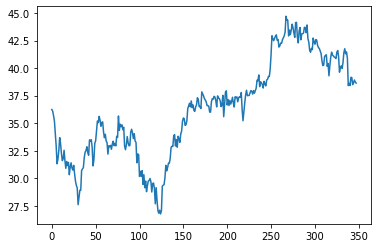

In [11]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=3
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)